# Replotting data for Thermal Spray Paper

The purpose of this notebook is for gathering tweaking plots of data to be used in the new thermal spray papers

This will be split into the two experiment sets as they require different methods

## Main requirements
- numpy
- matplotlib
- opencv
- seaborn

## Main imports

In [1]:
import trenchcoat.improcessing as imp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
from matplotlib.lines import Line2D

In [2]:
# labels for matching filename with flowrate
flow_rate = {"sheffield_doe_flowrate_gasrate_0002":"40",
             "sheffield_doe_flowrate_gasrate_0003":"50",
             "sheffield_doe_flowrate_gasrate_0004":"60",
             "sheffield_doe_flowrate_gasrate_0005":"70",
             "sheffield_doe_flowrate_gasrate_0006":"80",
             "sheffield_doe_flowrate_gasrate_0007":"80",
             "sheffield_doe_flowrate_gasrate_0008":"80"}
# temperature thresholds
INNER_THRESH = 1000.0
OUTER_THRESH = 500.0

THERMAL_SPRAY = [fn for fn in glob(r"tool-head-calibrated/npz/*.npz") if not (int(os.path.splitext(os.path.basename(fn))[0].split('_')[-1]) in [1,3,5,7,8])]

sns.set_theme()

## Powder-Plasma
This section is regarding the footage for the gas flow rate experiments. Contains data on the plasma and powder streams.

### Assembling Dataframes

The following section is for collecting the data into a single dataframe for replotting. Takes around 3-4 mins to collect the data.

If there's a dataframe already saved, use pd.from_csv to load it.

#### Main Statistics

In [4]:
try_load = True
force_rebuild = True
# if the path does not exist
if (not try_load) and (not os.path.exists(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{INNER_THRESH}.csv")) or force_rebuild:
    pstack_og = imp.collectFolderAllPlasmaParams(THERMAL_SPRAY,tlim=INNER_THRESH)
    # assign flow rate for each supported file
    pstack_og['Flow Rate (SL/MIN)'] = None
    for fn in pstack_og.File.unique():
        pstack_og.loc[pstack_og.File == fn,'Flow Rate (SL/MIN)'] = flow_rate[fn]
    pstack_og.to_csv(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{INNER_THRESH}.csv")
else:
    pstack_og = pd.read_csv(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{INNER_THRESH}.csv")
# make a working copy of the dataframe to perform changes to
# keeps a master copy clean in case it needs to be restored
pstack = pstack_og.copy(deep=True)
print('Flow Rate (SL/MIN)',pstack['Flow Rate (SL/MIN)'].unique())
print("df shape",pstack.shape)

d:\envs\thermalspray\thermalspray\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\envs\thermalspray\thermalspray\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Git Clones\Plasma-Spray-iCoating\scripts\trenchcoat\trenchcoat\improcessing.py:1318: RuntimeWarning: invalid value encountered in cast
  g = self._shape[1]-(self._opt[0]*((g-g.min())/(g.max()-g.min()))).astype("int32")
d:\Git Clones\Plasma-Spray-iCoating\scripts\trenchcoat\trenchcoat\improcessing.py:1391: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return [skew(self._ct[:,:,0])[0],kurtosis(self._ct[:,:,0],fisher=True)[0],kurtosis(self._ct[:,:,0],fisher=False)[0]]


hist:  4383 3
hist arr:  (4383, 3)


d:\envs\thermalspray\thermalspray\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Git Clones\Plasma-Spray-iCoating\scripts\trenchcoat\trenchcoat\improcessing.py:1318: RuntimeWarning: invalid value encountered in cast
  g = self._shape[1]-(self._opt[0]*((g-g.min())/(g.max()-g.min()))).astype("int32")


hist:  4605 3
hist arr:  (4605, 3)


d:\envs\thermalspray\thermalspray\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\envs\thermalspray\thermalspray\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\Git Clones\Plasma-Spray-iCoating\scripts\trenchcoat\trenchcoat\improcessing.py:1318: RuntimeWarning: invalid value encountered in cast
  g = self._shape[1]-(self._opt[0]*((g-g.min())/(g.max()-g.min()))).astype("int32")


hist:  5608 3
hist arr:  (5608, 3)
Flow Rate (SL/MIN) ['40' '60' '80']
df shape (29190, 25)


Index(['Frame Index', 'Time (s)', 'Height (pixels)', 'Mean (pixels)',
       'Std Dev (pixels)', 'RMSE', 'Asymmetrical Angle (rads)', 'Skew',
       'Kurtosis (Fisher)', 'Kurtosis (Pearson)', 'Contour Area (pix^2)',
       'Midpoint Row (pixels)', 'Plasma Peak (row,col)', 'File',
       'Asymmetrical Angle (degrees)', 'Variance (deg C)', 'Std Dev (deg C)',
       'Mean Temperature (deg C)', 'Min. Temperature (deg C)',
       'Max. Temperature (deg C)', 'Width (pix)', 'Height (pix)',
       'Aspect Ratio (Width/Height)', 'Temperature Threshold (deg C)',
       'Flow Rate (SL/MIN)'],
      dtype='object')
['sheffield_doe_flowrate_gasrate_0002'
 'sheffield_doe_flowrate_gasrate_0004'
 'sheffield_doe_flowrate_gasrate_0006']
[  nan 1000.]


Text(0.5, 0.98, 'Contour Area (pixels squared) for each Gas Flow Rate\nTemperature Threshold 1000.0°C')

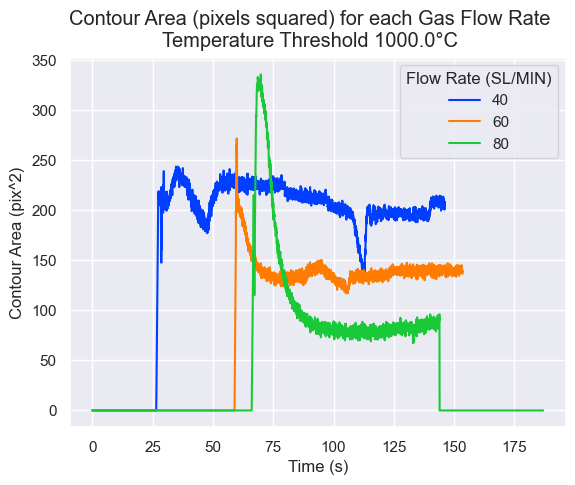

In [5]:
print(pstack.columns)
print(pstack.File.unique())
#pfilt = pstack[pstack['Flow Rate (SL/MIN)'] == '40' ]
print(pstack['Temperature Threshold (deg C)'].unique())
ax = sns.lineplot(pstack,x="Time (s)",y='Contour Area (pix^2)',hue='Flow Rate (SL/MIN)',palette='bright',estimator=None)
uq_th = pstack['Temperature Threshold (deg C)'].unique()
uq_th = uq_th[~np.isnan(uq_th)][0]
ax.figure.suptitle(f"Contour Area (pixels squared) for each Gas Flow Rate\nTemperature Threshold {uq_th}°C")

C:\Users\david\AppData\Local\Temp\ipykernel_13468\807134433.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  gps = pstack.groupby('Flow Rate (SL/MIN)').agg(np.max)


[Text(0, 0.5, 'Contour Area (pixels squared)'),
 Text(0.5, 1.0, 'Contour Area (pixels squared) for each Gas Flow Rate\nTemperature Threshold 1000.0°C')]

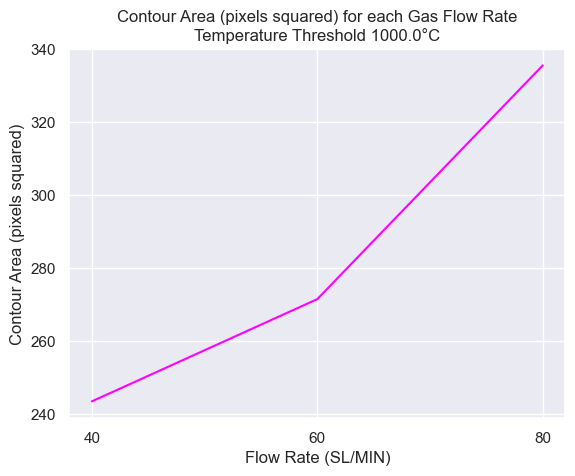

In [5]:
gps = pstack.groupby('Flow Rate (SL/MIN)').agg(np.max)
f,ax = plt.subplots()
sns.lineplot(gps,x=gps.index.astype("str"),y='Contour Area (pix^2)',ax=ax,color="magenta")
ax.set(ylabel='Contour Area (pixels squared)',title=f"Contour Area (pixels squared) for each Gas Flow Rate\nTemperature Threshold {uq_th}°C")

#### Coaxial Plane

In [6]:
coaxial_dfs = []
# flag to control saving the video files
# takes several minutes to process each file
save_video = False
try_load = True
force_rebuild = True
#PATH = r"doe-npz-em-01/npz/powder_plasma/has_plasma/*.npz" # laptop path
PATH = r"powder_plasma_npz/npz/has_plasma/*.npz" # desktop path
COAXIAL_PATHS = [fn for fn in glob(PATH) if not (int(os.path.splitext(os.path.basename(fn))[0].split('_')[-1]) in [1,3,5,7,8])]
if len(COAXIAL_PATHS) == 0:
    
if (not try_load) and (not os.path.exists(os.path.join(PATH,"coaxial-params.csv"))) or force_rebuild:
    for fn in COAXIAL_PATHS:
        print(fn)
        # calculate and assemble the dataframe of coaxial frame statistics
        # the plots are saved to the source location of the files
        f,ft,df = imp.coaxialPlaneParams(fn,k=1,filt=imp.clipMaskPlasma,plot_color="magenta")
        print("dataframe shape",df.shape)
        # get filename
        fname = os.path.splitext(os.path.basename(fn))[0]
        # assign label
        df['File'] = fname
        # assign flow rate
        if fname in flow_rate:
            df['Flow Rate (SL/MIN)'] = flow_rate[fname]
        # remove the rows where NaNs occur
        # typically occurs when entropy is all zero or certain thresholds weren't reached
        #df.dropna(inplace=True)
        # add to list
        coaxial_dfs.append(df)
        # close plots to save memory
        plt.close('all')
        # save video if desired
        if save_video:
            imp.videoCoaxialPlane(fn,k=1,filt=imp.clipMaskPlasma,mode='all',line_col=(0,255,0))
    # stack dataframes together for inspection later
    coaxial_stack = pd.concat(coaxial_dfs,ignore_index=True)
    coaxial_stack.to_csv(os.path.join(os.path.dirname(PATH),"coaxial-params.csv"))
else:
    coaxial_stack = pd.read_csv(os.path.join(os.path.dirname(PATH),"coaxial-params.csv"))
print(coaxial_stack.columns)
print(coaxial_stack.head())

powder_plasma_npz/npz/has_plasma\sheffield_doe_flowrate_gasrate_0002.npz
dataframe shape (8766, 15)
powder_plasma_npz/npz/has_plasma\sheffield_doe_flowrate_gasrate_0004.npz
dataframe shape (9210, 15)
powder_plasma_npz/npz/has_plasma\sheffield_doe_flowrate_gasrate_0006.npz
dataframe shape (11216, 15)
Index(['Frame Index', 'Time (s)', 'Min Temperature (deg C)',
       'Max Temperature (deg C)', 'Mean Temperature (deg C)',
       'Std Dev Temperature (deg C)', 'Variance Temperature (deg C)',
       'Entropy', 'Width (pix)', 'Height (pix)', 'Aspect Ratio (Width/Height)',
       'x^1', 'offset', 'Theta (rads)', 'Theta (degrees)', 'File',
       'Flow Rate (SL/MIN)'],
      dtype='object')
   Frame Index  Time (s)  Min Temperature (deg C)  Max Temperature (deg C)  \
0            0  0.000000                      0.0                      0.0   
1            1  0.033333                      0.0                      0.0   
2            2  0.066667                      0.0                      0.

### Inspection

In [8]:
print("\t\tMain Statistics")
print(pstack.columns)
print(pstack.shape)
#print(pstack.File.unique())
for fn in pstack.File.unique():
    print(fn,pstack[pstack.File==fn].shape)
pstack.describe()

		Main Statistics
Index(['Frame Index', 'Time (s)', 'Height (pixels)', 'Mean (pixels)',
       'Std Dev (pixels)', 'RMSE', 'Asymmetrical Angle (rads)', 'Skew',
       'Kurtosis (Fisher)', 'Kurtosis (Pearson)', 'Contour Area (pix^2)',
       'File', 'Asymmetrical Angle (degrees)', 'Variance (deg C)',
       'Std Dev (deg C)', 'Mean Temperature (deg C)',
       'Min. Temperature (deg C)', 'Max. Temperature (deg C)', 'Width (pix)',
       'Height (pix)', 'Aspect Ratio (w/h)', 'Temperature Threshold (deg C)',
       'Flow Rate (SL/MIN)'],
      dtype='object')
(18179, 23)
sheffield_doe_flowrate_gasrate_0002 (7176, 23)
sheffield_doe_flowrate_gasrate_0004 (5671, 23)
sheffield_doe_flowrate_gasrate_0005 (660, 23)
sheffield_doe_flowrate_gasrate_0006 (4672, 23)


,Frame Index,Time (s),Height (pixels),Mean (pixels),Std Dev (pixels),RMSE,Asymmetrical Angle (rads),Skew,Kurtosis (Fisher),Kurtosis (Pearson),...,Asymmetrical Angle (degrees),Variance (deg C),Std Dev (deg C),Mean Temperature (deg C),Min. Temperature (deg C),Max. Temperature (deg C),Width (pix),Height (pix),Aspect Ratio (w/h),Temperature Threshold (deg C)
count,18179.000000,18179.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,...,9089.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.0
mean,2934.587656,97.819589,26.068214,167.964242,6.707449,76.668384,1.391862,-0.001223,-1.202721,1.797279,...,79.747806,25770.039360,157.162746,1236.336066,1001.814954,1546.664907,26.065567,10.220792,2.575268,1000.0
std,910.454467,30.348482,4.406523,0.760734,1.281518,19.997201,0.029415,0.010374,0.020357,0.020357,...,1.685378,9343.257133,32.711287,53.028519,1.686348,90.349895,4.413506,1.878118,0.335588,0.0
min,795.000000,26.500000,2.000000,166.000000,0.000000,2.828427,1.301629,-0.707107,-3.000000,0.000000,...,74.577839,47.923885,6.922708,1014.103000,1000.003000,1021.125000,2.000000,2.000000,0.666667,1000.0
25%,2272.500000,75.750000,23.000000,168.000000,6.000000,64.461358,1.372066,-0.003988,-1.203846,1.796154,...,78.613571,19156.783294,138.408029,1213.000013,1000.545000,1517.133750,23.000000,9.000000,2.375000,1000.0
50%,2984.000000,99.466667,27.000000,168.000000,7.000000,80.999651,1.385448,0.000000,-1.202670,1.797330,...,79.380345,29111.973156,170.622311,1253.285600,1001.319000,1600.113000,27.000000,10.000000,2.583333,1000.0
75%,3677.000000,122.566667,29.000000,168.000000,8.000000,91.345498,1.411323,0.000000,-1.198171,1.801829,...,80.862849,32723.158094,180.895434,1272.272504,1002.595000,1600.113000,29.000000,12.000000,2.857143,1000.0
max,4604.000000,153.466667,40.000000,174.000000,11.000000,151.739909,1.556811,0.151624,-1.143491,1.856509,...,89.198713,43933.265545,209.602637,1373.722154,1013.259000,1600.113000,40.000000,14.000000,3.400000,1000.0


Index(['Frame Index', 'Time (s)', 'Min Temperature (deg C)',
       'Max Temperature (deg C)', 'Mean Temperature (deg C)',
       'Std Dev Temperature (deg C)', 'Variance Temperature (deg C)',
       'Entropy', 'Width (pix)', 'Height (pix)', 'Aspect Ratio (Width/Height)',
       'x^1', 'offset', 'Theta (rads)', 'Theta (degrees)', 'File',
       'Flow Rate (SL/MIN)'],
      dtype='object')


Text(0.5, 0.98, 'Estimated Coaxial Plane Angle (degrees)')

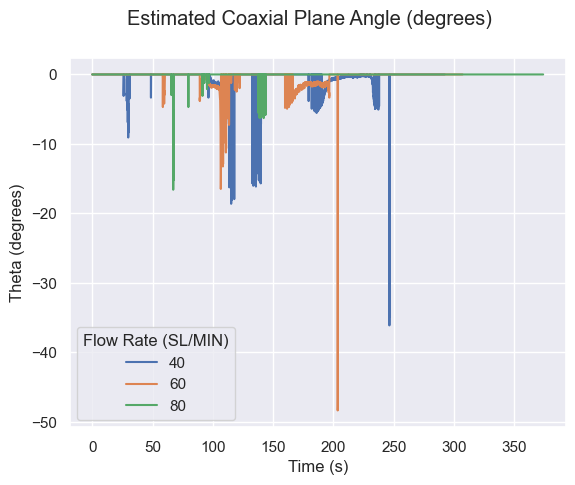

In [10]:
print(coaxial_stack.columns)
f,ax = plt.subplots()
sns.lineplot(coaxial_stack,x="Time (s)",y='Theta (degrees)',hue='Flow Rate (SL/MIN)',ax=ax)
f.suptitle("Estimated Coaxial Plane Angle (degrees)")

### Plotting

#### Average Contour Area

[40 60 80]


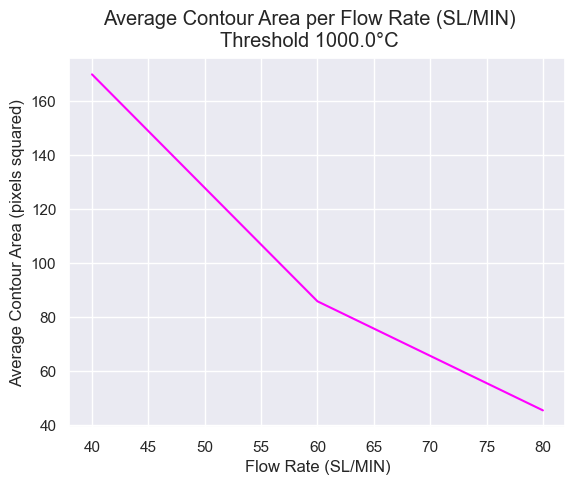

In [8]:
#f = imp.plotAverageContourArea(pstack)
def plotAverageContourArea(pstack:pd.DataFrame,x:str='Flow Rate (SL/MIN)',threshold:float=1000.0):
    '''
        Find the average contour area for each flow rate and plot it

        Checks if the specified user column exists, if not it defaults to the column File for grouping
        and warns the user as such.

        The input threshold is used for setting the title of the plot to indicate the temperature threshold used

        Inputs:
            pstack : Dataframe
            x : Column used for grouping and plotting on the x-axis. Default Flow Rate (SL/MIN).
            threshold : Temperature threshold used for generating the data. Used in title. Default 1000.0

        Returns matplotlib figure
    '''
    import warnings
    if not ('Flow Rate (SL/MIN)' in pstack.columns):
        warnings.warn("Cannot find Flow Rate! Default to File")
        x="File"
    # group by target x parameter
    mean_arr = pstack.groupby(x).apply(lambda x : x['Contour Area (pix^2)'].mean())
    # make a separate axis to ensure that it's not overriding an existing axis
    f,ax = plt.subplots()
    ax = sns.lineplot(mean_arr,color='magenta',ax=ax)
    # set labels
    ax.set(xlabel='Flow Rate (SL/MIN)',ylabel="Average Contour Area (pixels squared)")
    ax.figure.suptitle(f"Average Contour Area per Flow Rate (SL/MIN)\nThreshold {threshold}°C")
    return f

def plotAggContourArea(pstack:pd.DataFrame,agg,x:str='Flow Rate (SL/MIN)',threshold:float=1000.0):
    '''
        Find the average contour area for each flow rate and plot it

        Checks if the specified user column exists, if not it defaults to the column File for grouping
        and warns the user as such.

        The input threshold is used for setting the title of the plot to indicate the temperature threshold used

        agg is recommended to be a defined function rather than lambda so the name of it can be properly displayed

        Inputs:
            pstack : Dataframe
            agg : Method for summarising the contour area for each group.
            x : Column used for grouping and plotting on the x-axis. Default Flow Rate (SL/MIN).
            threshold : Temperature threshold used for generating the data. Used in title. Default 1000.0

        Returns matplotlib figure
    '''
    import warnings
    if not ('Flow Rate (SL/MIN)' in pstack.columns):
        warnings.warn("Cannot find Flow Rate! Default to File")
        x="File"
    # group by target x parameter
    mean_arr = pstack.groupby(x).apply(lambda x : agg(x['Contour Area (pix^2)']))
    print("columns",mean_arr.columns)
    # make a separate axis to ensure that it's not overriding an existing axis
    f,ax = plt.subplots()
    ax = sns.lineplot(mean_arr,x=mean_arr.index.astype("str"),color='magenta',ax=ax)
    # set labels
    ax.set(xlabel='Flow Rate (SL/MIN)',ylabel="Average Contour Area (pixels squared)")
    ax.figure.suptitle(f"{agg.__name__} Contour Area per Flow Rate (SL/MIN)\nThreshold {threshold}°C")
    return f

print(pstack['Flow Rate (SL/MIN)'].unique())
f = plotAverageContourArea(pstack,threshold=INNER_THRESH)

#### Max of Temperature Metrics

Text(0.5, 0.98, 'Mean Temperature (deg C)')

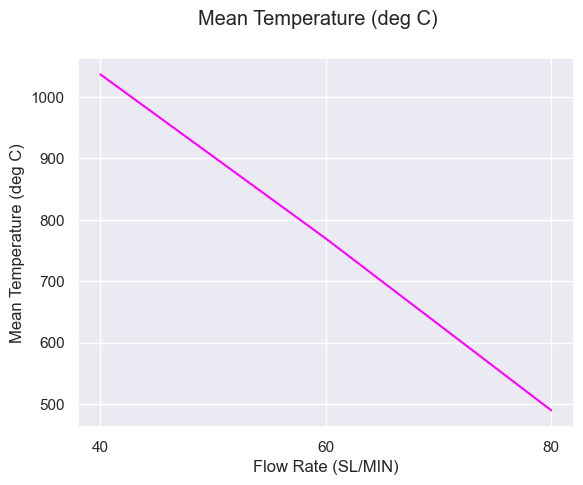

In [5]:
maxt = pstack.groupby("Flow Rate (SL/MIN)").mean(numeric_only=True)
ax=sns.lineplot(maxt,x=maxt.index.astype("str"),y="Mean Temperature (deg C)",color="magenta")
ax.figure.suptitle("Mean Temperature (deg C)")

#### Area for 500 C

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


hist:  4383 3
hist arr:  (4383, 3)
hist:  4605 3
hist arr:  (4605, 3)


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


hist:  5608 3
hist arr:  (5608, 3)
['sheffield_doe_flowrate_gasrate_0002'
 'sheffield_doe_flowrate_gasrate_0004'
 'sheffield_doe_flowrate_gasrate_0006']


Text(0.5, 0.98, 'Contour Area (pixels squared) for threshold 500.0 °C')

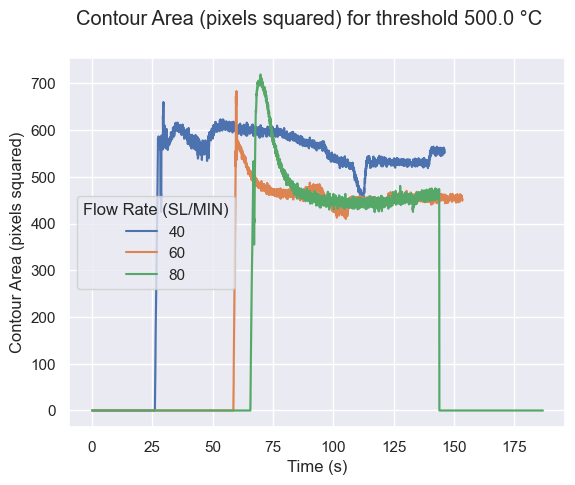

In [4]:
# gather dataframes with target threshold
try_load = True
force_rebuild = True
# if the path does not exist
if (not try_load) and (not os.path.exists(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{OUTER_THRESH}.csv")) or force_rebuild:
    paths = [fn for fn in glob(r"tool-head-calibrated/npz/*.npz") if not (int(os.path.splitext(os.path.basename(fn))[0].split('_')[-1]) in [1,3,5,7,8])]
    area_500_og = imp.collectFolderAllPlasmaParams(paths,tlim=OUTER_THRESH)
    # assign flow rate for each supported file
    area_500_og['Flow Rate (SL/MIN)'] = None
    for fn in area_500_og.File.unique():
        area_500_og.loc[area_500_og.File == fn,'Flow Rate (SL/MIN)'] = flow_rate[fn]
    area_500_og.to_csv(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{OUTER_THRESH}.csv")
else:
    area_500_og = pd.read_csv(rf"tool-head-calibrated/npz/tool-head-calibrated-th-{OUTER_THRESH}.csv")
# make a working copy of the dataframe to perform changes to
# keeps a master copy clean in case it needs to be restored
area_500 = area_500_og.copy(deep=True)
# check that it's found files
print(area_500.File.unique())
# plot the area for 500 C
ax = sns.lineplot(area_500,x="Time (s)",y='Contour Area (pix^2)',hue="Flow Rate (SL/MIN)")
ax.set_ylabel("Contour Area (pixels squared)")
ax.figure.suptitle(f"Contour Area (pixels squared) for threshold {OUTER_THRESH} °C")

In [7]:
area_500['File'].unique()

array(['sheffield_doe_flowrate_gasrate_0002',
       'sheffield_doe_flowrate_gasrate_0004',
       'sheffield_doe_flowrate_gasrate_0006'], dtype=object)

#### Max Area for Different Thresholds

500 C max (3, 23) Index(['40', '60', '80'], dtype='object', name='Flow Rate (SL/MIN)') Index(['40', '60', '80'], dtype='object', name='Flow Rate (SL/MIN)')
1000 C max (3, 24) Int64Index([40, 60, 80], dtype='int64', name='Flow Rate (SL/MIN)')


C:\Users\david\AppData\Local\Temp\ipykernel_13276\3212945431.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_500 = area_500.groupby('Flow Rate (SL/MIN)').max(numeric_only=False)
C:\Users\david\AppData\Local\Temp\ipykernel_13276\3212945431.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_1000 = pstack.groupby('Flow Rate (SL/MIN)').max(numeric_only=False)


Text(0.5, 0.98, 'Max Contour Area for Different Temperature Thresholds')

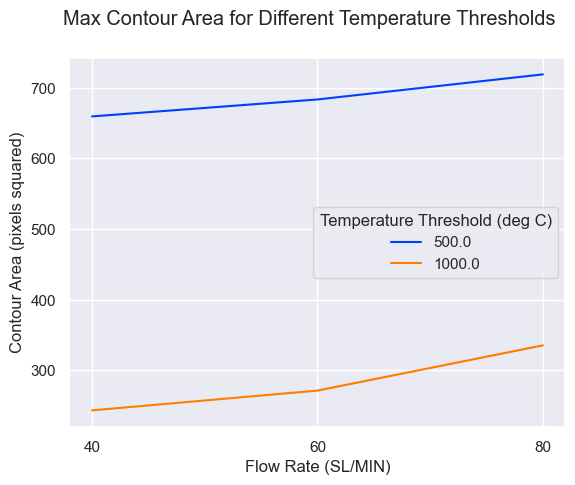

In [32]:
# find the max area for outer threshold dataframe
max_500 = area_500.groupby('Flow Rate (SL/MIN)').max(numeric_only=False)
print("500 C max",max_500.shape,max_500.index,max_500.index.astype("str"))
# find the max area for inner threshold dataframe
max_1000 = pstack.groupby('Flow Rate (SL/MIN)').max(numeric_only=False)
print("1000 C max",max_1000.shape,max_1000.index)
area_compare = pd.concat([max_500,max_1000])

f,ax = plt.subplots()
sns.lineplot(area_compare,x=area_compare.index.astype("str"),y="Contour Area (pix^2)",ax=ax,hue='Temperature Threshold (deg C)',palette='bright')
ax.set_ylabel("Contour Area (pixels squared)")
f.suptitle("Max Contour Area for Different Temperature Thresholds")


In [14]:
area_500['Temperature Threshold (deg C)'].unique()

array([  nan, 1000.])

#### Contour Area & Aspect Ratio Twin Axis

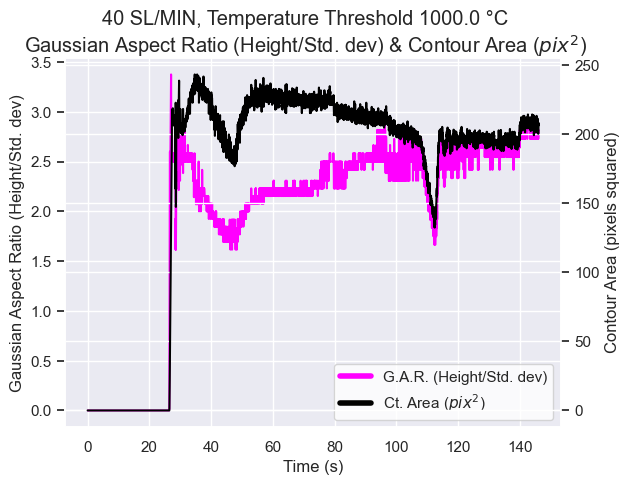

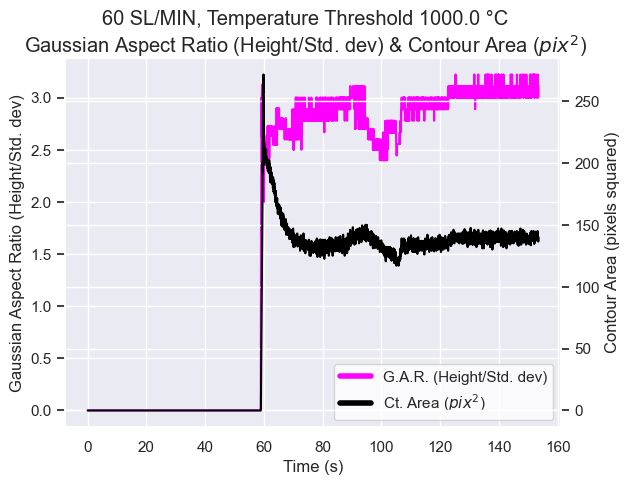

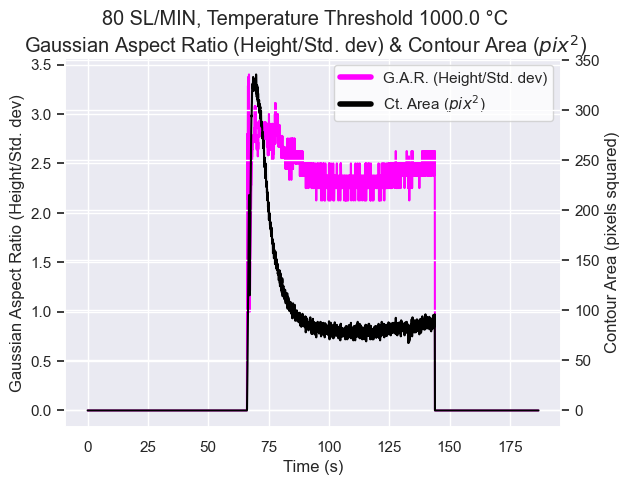

In [25]:
#f = imp.plotAreaAspectRatio(pstack,"tool-head-calibrated")
def plotAreaAspectRatio(plasma_all_params:pd.DataFrame,groupkey:str="File",opath:str=".",**kwargs)->dict:
    '''
        Plot the aspect ratio and contour area against time along two separate axis.

        This was a requested plot

        The supplied dataframe must have the following columns at least:
            File : Filename used to generate the data
            Aspect Ratio (w/h) : Aspect Ratio between the width and height of the gaussian distribution
            Contour Area (pix^2) : Area of the contour found to describe the plasma

        All filenames follow the format

            {fn}-area-aspect-ratio.png

        where fn is the source filename.
        
        Inputs:
            plasma_all_params : Dataframe with at least the required columns
            opath : Output folder to save the images to. Default .
            groupkey : Column name used to group files by. Default File.
            file_replace : Replace the filename in the title with the corresponding string
            aspect_color : Line color for plotting Aspect ratio. Default magenta.
            contour_color : Line color for plotting Contour Area. Default black.
            format_groupkey : Function to format the group key. Default lambda x : x

        Returns dict of figures for the generated figures.
    '''
    from matplotlib.lines import Line2D
    figs = {}
    fmt_key = kwargs.get("format_groupkey",lambda x : x)
    # separate into groups
    for fn,gp in plasma_all_params.groupby(groupkey):
        # make a figure
        f,ax = plt.subplots()
        tax = ax.twinx()
        # plot the aspect ratio on main axis
        sns.lineplot(gp,x="Time (s)",y='Aspect Ratio (Width/Height)',color=kwargs.get("aspect_color",'magenta'),ax=ax,estimator=None)
        # plot the contour area on the twin axis
        sns.lineplot(gp,x="Time (s)",y='Contour Area (pix^2)',color=kwargs.get("contour_color",'black'),ax=tax,estimator=None)
        if kwargs.get("mark_na",False):
            sns.scatterplot(gp[gp.isna()],x="Time (s)",y='Contour Area (pix^2)',color="red",marker='x',ax=tax)
        # set the labels
        ax.set(xlabel="Time (s)",ylabel="Gaussian Aspect Ratio (Height/Std. dev)")
        tax.set_ylabel("Contour Area (pixels squared)")
        f.suptitle(f"{fmt_key(fn)}\nGaussian Aspect Ratio (Height/Std. dev) & Contour Area ($pix^2$)")
        # make a custom legend
        custom_lines = [Line2D([0],[0],color=kwargs.get("aspect_color",'magenta'),lw=4),
                        Line2D([0],[0],color=kwargs.get("contour_color",'black'),lw=4)]
        ax.legend(custom_lines,['G.A.R. (Height/Std. dev)','Ct. Area ($pix^2$)'],loc='best',facecolor='white')
        # save the file
        f.savefig(os.path.join(opath,f"{fn}-area-aspect-ratio.png"))
        # put the figure in a dict to return for further perusing
        figs[fn] = f
    return figs
# get the actual temperature threshold
uq_th = pstack['Temperature Threshold (deg C)'].unique()
uq_th = uq_th[~np.isnan(uq_th)][0]
f = plotAreaAspectRatio(pstack,'Flow Rate (SL/MIN)',opath="tool-head-calibrated",format_groupkey=lambda x : f"{x} SL/MIN, Temperature Threshold {uq_th} °C",mark_na=True)
plt.show()

#### Contour Area vs Aspect Ratio

0.6666666666666666 3.4


(0.0, 350.0)

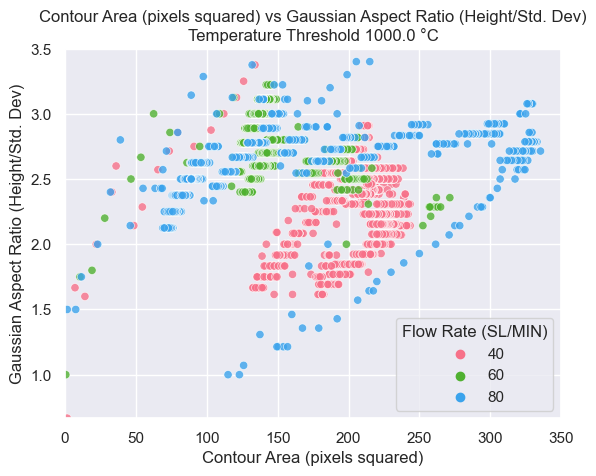

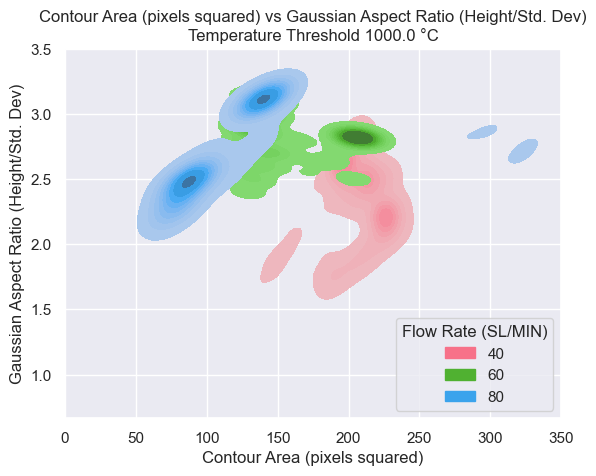

In [29]:
# use this palette
# get the required number of colors
pal = sns.husl_palette(3)

## Scatter plot of the data
f,ax = plt.subplots()
pstack_plot = pstack.replace(0,np.nan,method="ffill")
#pstack_plot = pstack_plot[pstack_plot['Flow Rate (SL/MIN)'] != 70]
ax=sns.scatterplot(pstack_plot,x='Contour Area (pix^2)',y='Aspect Ratio (Width/Height)',hue='Flow Rate (SL/MIN)',alpha=0.8,palette=pal,ax=ax)
#ax.set_xlim(0,pstack_plot['Contour Area (pix^2)'].max()+30)
print(pstack_plot['Aspect Ratio (Width/Height)'].min(),pstack_plot['Aspect Ratio (Width/Height)'].max())
ax.set_xlim(0,350)
ax.set_ylim(pstack_plot['Aspect Ratio (Width/Height)'].min(),3.5)
ax.set(xlabel="Contour Area (pixels squared)",ylabel="Gaussian Aspect Ratio (Height/Std. Dev)",
       title=f"Contour Area (pixels squared) vs Gaussian Aspect Ratio (Height/Std. Dev)\nTemperature Threshold {INNER_THRESH} °C")

## Density plot of the data
f,ax = plt.subplots()
ax=sns.kdeplot(pstack_plot,x='Contour Area (pix^2)',y='Aspect Ratio (Width/Height)',hue='Flow Rate (SL/MIN)',fill=True,alpha=1.0,palette=pal,ax=ax)
sns.move_legend(ax,"lower right")
# set axis limits and labels to make a prettier plot
#ax.set_xlim(0,pstack_plot['Contour Area (pix^2)'].max()+30)
ax.set(xlabel="Contour Area (pixels squared)",ylabel="Gaussian Aspect Ratio (Height/Std. Dev)",
       title=f"Contour Area (pixels squared) vs Gaussian Aspect Ratio (Height/Std. Dev)\nTemperature Threshold {INNER_THRESH} °C")
#ax.set_ylim(1.5,3.5)
ax.set_ylim(pstack_plot['Aspect Ratio (Width/Height)'].min(),3.5)
ax.set_xlim(0,350)

#### Asymmetric Angle

c:\Users\uos\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\uos\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\uos\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will 

Text(0.5, 0.98, 'Asymmetrical Angle Angle and Variance (degrees)\n(clipped to ≤8°)')

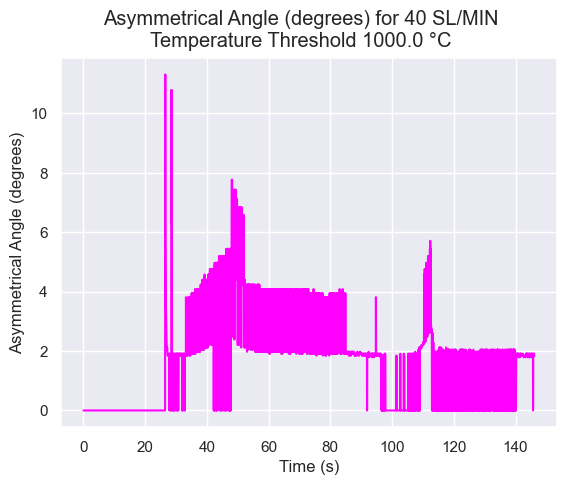

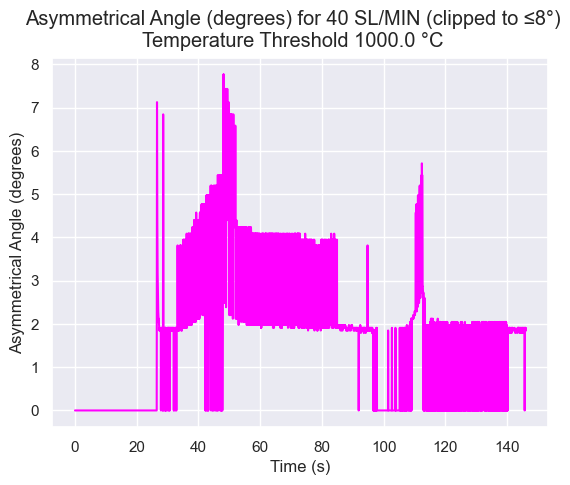

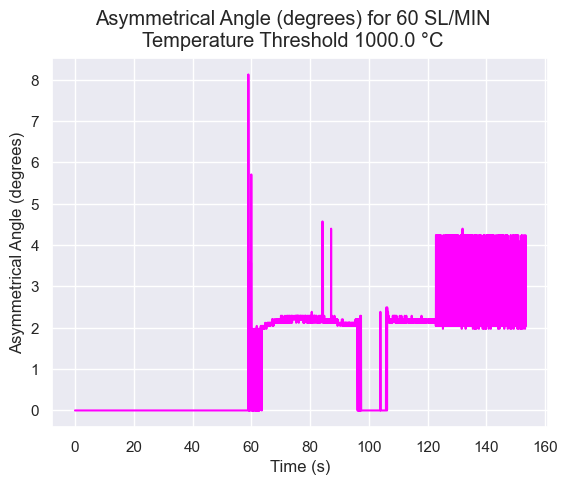

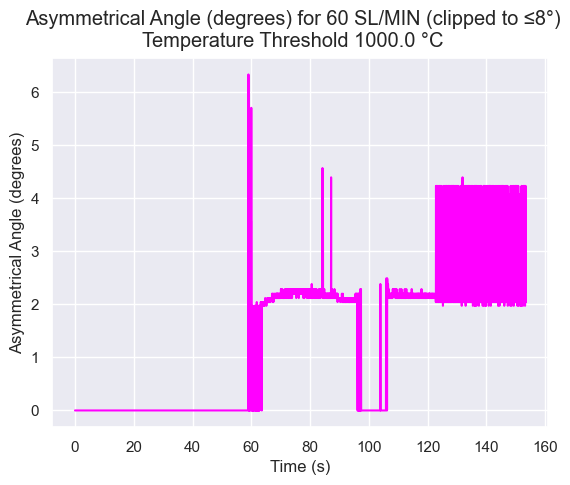

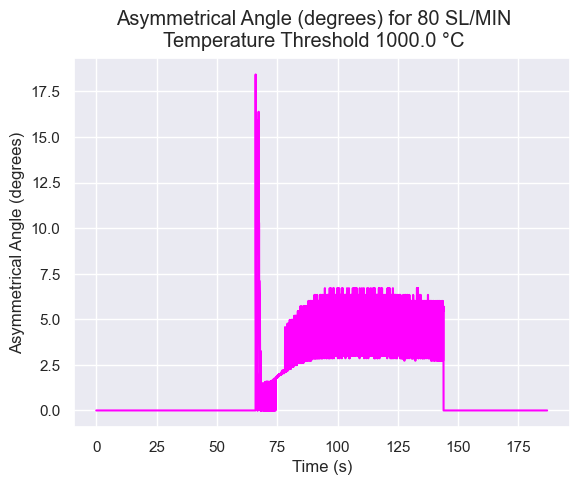

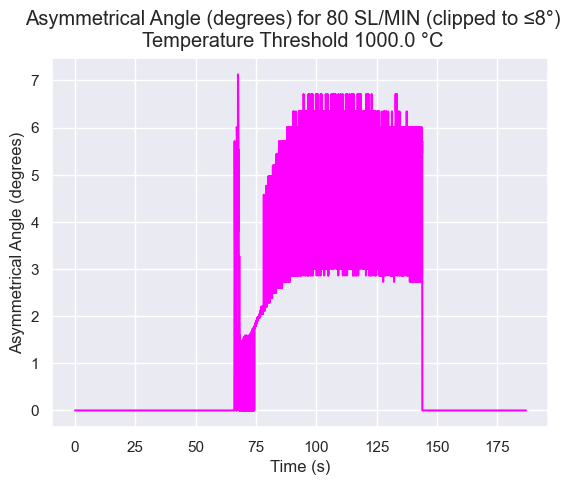

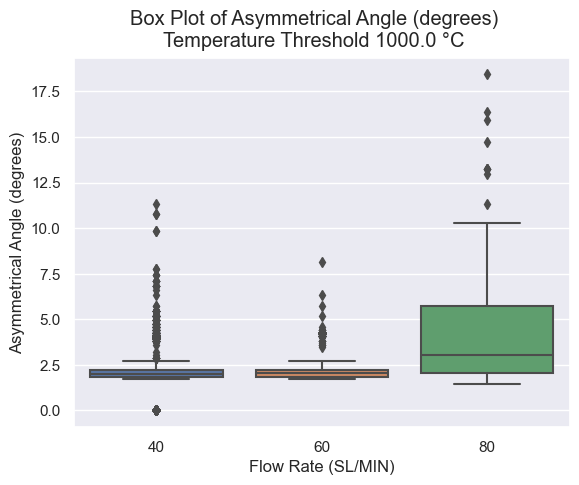

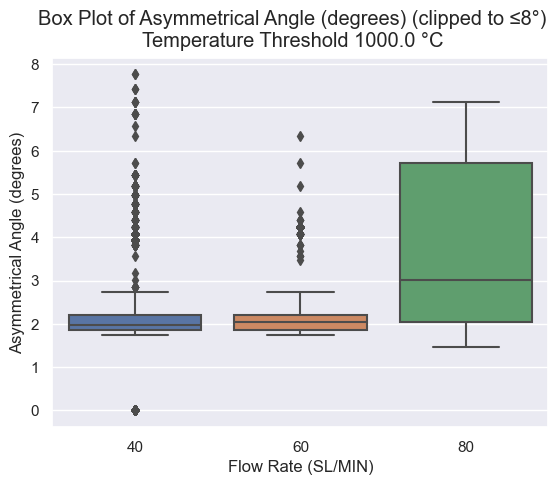

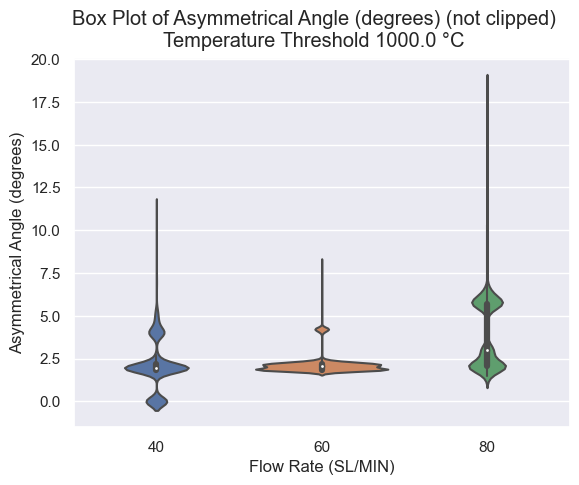

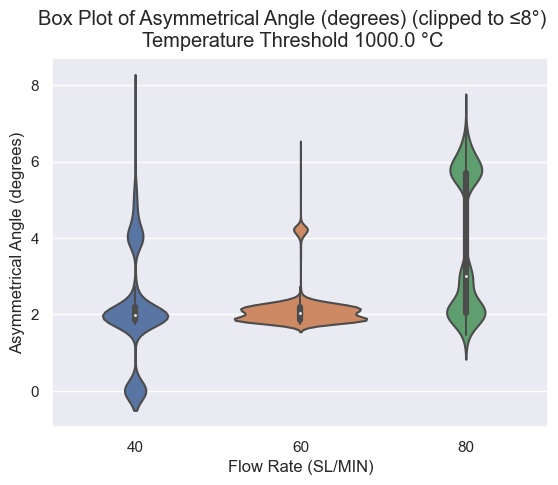

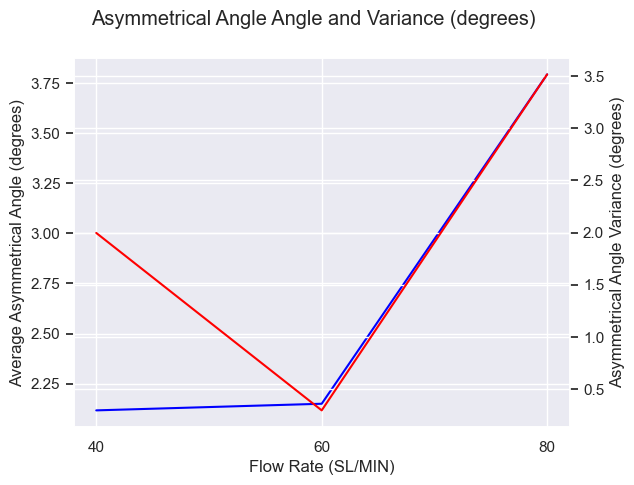

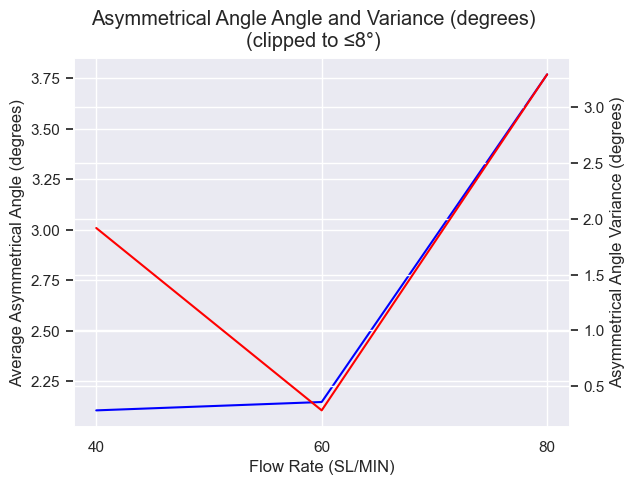

In [21]:
#sns.lineplot(pstack,x="Time (s)",y='Asymmetrical Angle (degrees)',hue='Flow Rate (SL/MIN)',palette="bright",estimator=None)
th = 8
for fn,gp in pstack.groupby('Flow Rate (SL/MIN)'):
    f,ax = plt.subplots()
    sns.lineplot(gp,x="Time (s)",y='Asymmetrical Angle (degrees)',color="magenta",estimator=None,ax=ax)
    f.suptitle(f'Asymmetrical Angle (degrees) for {fn} SL/MIN\nTemperature Threshold {INNER_THRESH} °C')

    f,ax = plt.subplots()
    sns.lineplot(gp[gp['Asymmetrical Angle (degrees)']<=th],x="Time (s)",y='Asymmetrical Angle (degrees)',color="magenta",estimator=None,ax=ax)
    f.suptitle(f'Asymmetrical Angle (degrees) for {fn} SL/MIN (clipped to ≤{th}°)\nTemperature Threshold {INNER_THRESH} °C')

## box plots
pstack_plot = pstack.replace(0,np.nan,method="ffill")
f,ax = plt.subplots()
sns.boxplot(pstack_plot, x='Flow Rate (SL/MIN)', y='Asymmetrical Angle (degrees)',ax=ax)
#ax.set_ylim(0,20)
f.suptitle(f'Box Plot of Asymmetrical Angle (degrees)\nTemperature Threshold {INNER_THRESH} °C')

f,ax = plt.subplots()
sns.boxplot(pstack_plot[pstack_plot['Asymmetrical Angle (degrees)']<=th], x='Flow Rate (SL/MIN)', y='Asymmetrical Angle (degrees)',ax=ax)
#ax.set_ylim(0,20)
f.suptitle(f'Box Plot of Asymmetrical Angle (degrees) (clipped to ≤{th}°)\nTemperature Threshold {INNER_THRESH} °C')

## violin plots
f,ax = plt.subplots()
sns.violinplot(pstack_plot, x='Flow Rate (SL/MIN)', y='Asymmetrical Angle (degrees)',ax=ax)
#ax.set_ylim(0,20)
f.suptitle(f'Box Plot of Asymmetrical Angle (degrees) \nTemperature Threshold {INNER_THRESH} °C')

f,ax = plt.subplots()
sns.violinplot(pstack_plot[pstack_plot['Asymmetrical Angle (degrees)']<=th], x='Flow Rate (SL/MIN)', y='Asymmetrical Angle (degrees)',ax=ax)
#ax.set_ylim(0,20)
f.suptitle(f'Box Plot of Asymmetrical Angle (degrees) (clipped to ≤{th}°)\nTemperature Threshold {INNER_THRESH} °C')

## plot average and variance
f,ax = plt.subplots()
gps = pstack_plot.groupby('Flow Rate (SL/MIN)')
avg_angle = gps.apply(np.mean)
sns.lineplot(avg_angle,x=avg_angle.index.astype("str"),y='Asymmetrical Angle (degrees)',ax=ax,color="blue")
tax = ax.twinx()
var_angle = gps.apply(np.var)
sns.lineplot(var_angle,x=var_angle.index.astype("str"),y='Asymmetrical Angle (degrees)',ax=tax,color="red")
ax.set_ylabel("Average Asymmetrical Angle (degrees)")
tax.set_ylabel("Asymmetrical Angle Variance (degrees)")
f.suptitle("Asymmetrical Angle Angle and Variance (degrees)")

f,ax = plt.subplots()
gps = pstack_plot[pstack_plot['Asymmetrical Angle (degrees)']<=th].groupby('Flow Rate (SL/MIN)')
avg_angle = gps.mean(numeric_only=True)
sns.lineplot(avg_angle,x=avg_angle.index.astype("str"),y='Asymmetrical Angle (degrees)',ax=ax,color="blue")
tax = ax.twinx()
var_angle = gps.var(numeric_only=True)
sns.lineplot(var_angle,x=var_angle.index.astype("str"),y='Asymmetrical Angle (degrees)',ax=tax,color="red")
ax.set_ylabel("Average Asymmetrical Angle (degrees)")
tax.set_ylabel("Asymmetrical Angle Variance (degrees)")
f.suptitle(f"Asymmetrical Angle Angle and Variance (degrees)\n(clipped to ≤{th}°)")

#### Max Asymm Angle Frame

sheffield_doe_flowrate_gasrate_0002 frame index 795
sheffield_doe_flowrate_gasrate_0004 frame index 1769
sheffield_doe_flowrate_gasrate_0005 frame index 2845
sheffield_doe_flowrate_gasrate_0006 frame index 1982


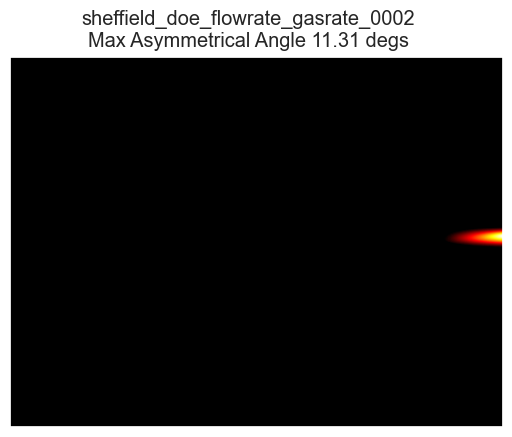

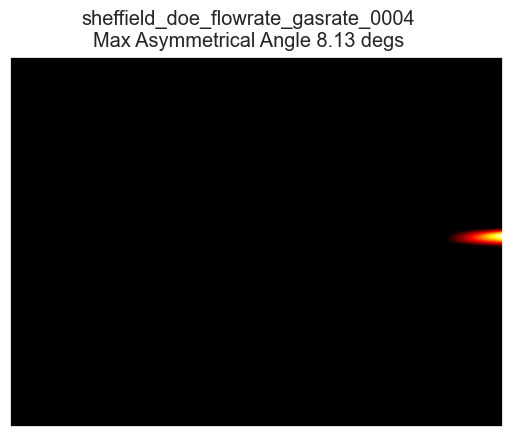

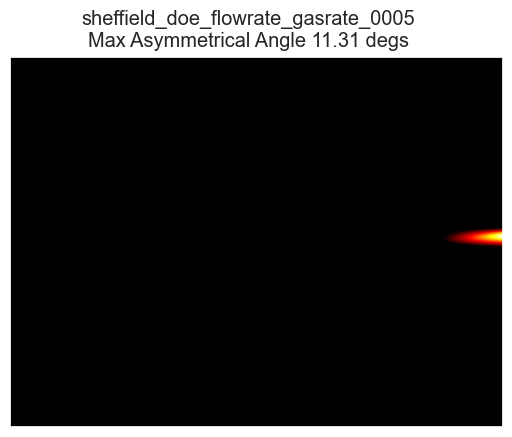

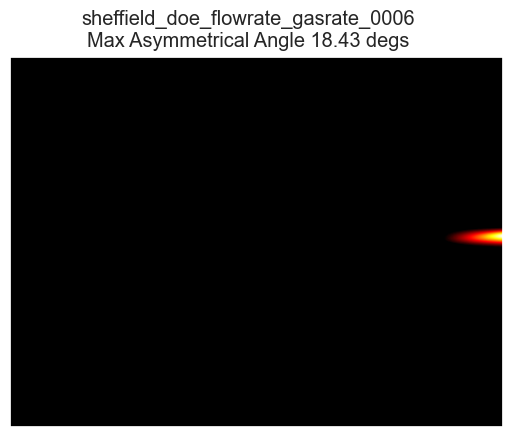

In [6]:
import cv2
for fn,gp in pstack.groupby('Flow Rate (SL/MIN)'):
    data = np.load(os.path.join("tool-head-calibrated/npz",gp.File.unique()[0]+".npz"))["arr_0"]
    # find where angle is max
    ii = gp['Asymmetrical Angle (degrees)'].argmax()
    print(gp.File.unique()[0],"frame index",ii)
    # get the frame
    frame = data[ii,...]
    # normalize
    frame_norm = (255*(frame - np.min(frame))/np.ptp(frame)).astype("uint8")
    # apply color map
    frame_gray = cv2.applyColorMap(frame_norm,cv2.COLORMAP_HOT)
    # reverse channels
    frame_gray = frame_gray[:,:,::-1]
    f,ax = plt.subplots()
    ax.imshow(frame_gray)
    #ax.axis('off')
    # Hide grid lines
    ax.grid(False)
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    f.suptitle(f"{gp.File.unique()[0]}\nMax Asymmetrical Angle {gp['Asymmetrical Angle (degrees)'].max():.2f} degs")

In [20]:
print(frame_norm.min(),frame_norm.max())

0 4


#### Coaxial Plane Angle

In [5]:
sns.lineplot()

Index(['Unnamed: 0', 'Frame Index', 'Time (s)', 'Min Temperature (deg C)',
       'Max Temperature (deg C)', 'Mean Temperature (deg C)',
       'Std Dev Temperature (deg C)', 'Variance Temperature (deg C)',
       'Entropy', 'Width (pix)', 'Height (pix)', 'Aspect Ratio (W/H)', 'x^1',
       'offset', 'Theta', 'File', 'Flow Rate (SL/MIN)'],
      dtype='object')

#### All Parameters (Group and Individual)

In [10]:
#imp.plotPlasmaParams(pstack,"tool-head-calibrated")
def plotPlasmaParams(plasma_all_params:pd.DataFrame,opath:str=".",**kwargs):
    '''
        Iterate over each column in the dataframe, plot and save figures to a target folder

        Designed for dataframes generated by collectPlasmaStats and plasmaGaussianParams

        It first plots the columns setting Hue based on column File.
        It then groups the data via File and then plots each column again. In this case,
        the saved files have the source filename added as a prefix.

        Inputs:
            plasma_all_params : Pandas dataframe
            opath : Output folder to save the plots in
            group_key : Grouping key column for gathering data together. Default File.
    '''
    figs = {}
    for c in plasma_all_params.columns:
        if c in ["Frame Index","Time (s)","File","Flow Rate (SL/MIN)"]:
            continue
        c_title = c
        # the forward slashes in the Aspect Ratio column name cannot be used in saving
        # to a replacement is needed
        if "Aspect Ratio" in c:
            c_title = "Aspect Ratio"
        f,ax = plt.subplots()
        ax = sns.lineplot(plasma_all_params,x="Time (s)",y=c,hue="File",ax=ax)
        ax.figure.suptitle(c_title)
        ax.figure.savefig(os.path.join(opath,f"{c_title}.png"))
        figs[c] = f

    # group by target key
    for fn,gp in plasma_all_params.groupby(kwargs.get("group_key","File")):
        for c in gp.columns:
            if c in ["Frame Index","Time (s)","File","Flow Rate (SL/MIN)"]:
                continue
            c_title = c
            if "Aspect Ratio" in c:
                c_title = "Aspect Ratio"
            f,ax = plt.subplots()
            ax = sns.lineplot(gp,x="Time (s)",y=c,color=kwargs.get("line_col","magenta"),ax=ax)
            ax.figure.suptitle(f"{fn}\n{c_title}")
            ax.figure.savefig(os.path.join(opath,f"{fn}-{c_title}.png"))
            figs[gp+"-"+c]=f
    return figs

figs = plotPlasmaParams(pstack,"tool-head-calibrated")

#### Violin Plot of Data

In [8]:
pstack.columns

Index(['Frame Index', 'Time (s)', 'Height (pixels)', 'Mean (pixels)',
       'Std Dev (pixels)', 'RMSE', 'Asymmetrical Angle (rads)', 'Skew',
       'Kurtosis (Fisher)', 'Kurtosis (Pearson)', 'Contour Area (pix^2)',
       'Midpoint Row (pixels)', 'Plasma Peak (row,col)', 'File',
       'Asymmetrical Angle (degrees)', 'Variance (deg C)', 'Std Dev (deg C)',
       'Mean Temperature (deg C)', 'Min. Temperature (deg C)',
       'Max. Temperature (deg C)', 'Width (pix)', 'Height (pix)',
       'Aspect Ratio (Width/Height)', 'Temperature Threshold (deg C)',
       'Flow Rate (SL/MIN)'],
      dtype='object')

<Axes: xlabel='Flow Rate (SL/MIN)', ylabel='Max. Temperature (deg C)'>

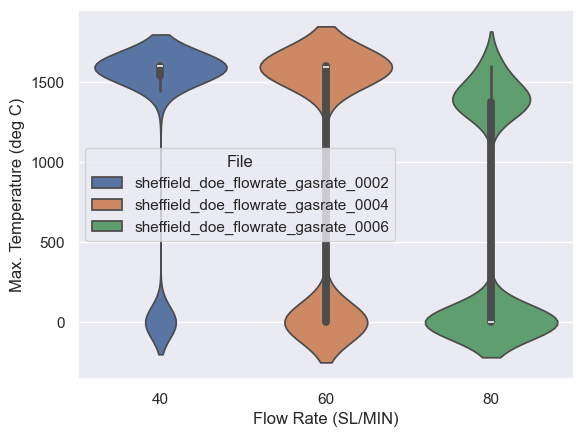

In [20]:
max_temp = {}
for k in pstack['File'].unique():
    max_temp[k] = pstack[pstack['File'] == k]['Max. Temperature (deg C)'].values
max_temp_len = {k : v.shape[0] for k,v in max_temp.items()}
max_temp_len = dict(sorted(max_temp_len.items(), key=lambda kv : kv[1], reverse=True))

max_temp_df = pd.DataFrame(columns=max_temp_len.keys())
for k,v in max_temp_len.items():
    max_temp_df[k] = v

plt.close("all")
sns.violinplot(pstack, x='Flow Rate (SL/MIN)', y='Max. Temperature (deg C)', hue='File')